In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import GetOldTweets3 as got
import seaborn as sns
import datetime
import os
import nltk
from textblob import TextBlob
import yfinance as yf
#from yahoofinancials import YahooFinancials

## Data Extraction

In [65]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
week = today - datetime.timedelta(days=7)
Three_Days = datetime.timedelta(days=3)
Yfinacne_ticker = 'TSLA'
ticker = '$TSLA'
Stock_Name = 'Tesla Stock'
since_date = str(week)
until_date = str(today)
count = 8000
Location = 'London, United Kingdom'
Distance = '200mi'

In [8]:
tweetCriteria1 = got.manager.TweetCriteria().setQuerySearch(ticker)\
    .setSince(since_date).setUntil(until_date).setMaxTweets(count).setLang('en') #Search number 1

In [9]:
tweetCriteria2 = got.manager.TweetCriteria().setQuerySearch(Stock_Name)\
    .setSince(since_date).setUntil(until_date).setMaxTweets(count).setLang('en') #Search number 2

In [10]:
# Creation of list that contains all tweets number 1
tweets = got.manager.TweetManager.getTweets(tweetCriteria1)

In [ ]:
# Creation of list that contains all tweets number 2
tweets2 = got.manager.TweetManager.getTweets(tweetCriteria2)

In [11]:
# Creating list of chosen tweet data number 1
text_tweets = [[tweet.date, tweet.text, tweet.permalink, tweet.id] for tweet in tweets]

In [ ]:
# Creating list of chosen tweet data number 2
text_tweets2 = [[tweet2.date, tweet2.text, tweet2.permalink, tweet2.id] for tweet2 in tweets2]

In [13]:
#Creating Dataframes 
df0 = pd.DataFrame(data=text_tweets, columns = ['Time', 'Tweet','Link','ID'])
#df1 = pd.DataFrame(data=text_tweets2, columns = ['Time', 'Tweet','Link','ID'])

In [14]:
#Combining Dataframes
df = df0
#df = pd.concat([df0, df1])

In [15]:
#pd.set_option('display.max_colwidth', None)
df.shape

(8000, 4)

In [16]:
df.sample(5)

,Time,Tweet,Link,ID
1884,2020-08-13 16:09:43+00:00,Xtrader Trades discord! 100% free! Chatroom: h...,https://twitter.com/stocktrade1_5/status/12939...,1293942819535560704
3878,2020-08-13 08:52:11+00:00,In this COVID-19 market rally since March brea...,https://twitter.com/Spekoliunas/status/1293832...,1293832711057158144
3783,2020-08-13 10:45:21+00:00,$TSLA bears on the sideline calling a dump,https://twitter.com/aromaninterest/status/1293...,1293861192331558912
4357,2020-08-13 02:29:23+00:00,https://discord.gg/ssVhPWp one of the largest ...,https://twitter.com/Christi57973254/status/129...,1293736377146900481
1266,2020-08-13 18:00:03+00:00,For the $TSLA fans,https://twitter.com/drpetetobin/status/1293970...,1293970587073691649


In [17]:
df['Time'].iloc[0]

Timestamp('2020-08-13 23:59:19+0000', tz='UTC')

In [18]:
df['Tweet'].iloc[0]

'Yeah I looked at $TSLA and $AAPL and they came up in my scans but were too far down the rankings for my system. Many ways to skin a cat as they say '

## Data Prep / Cleaning

In [19]:
df['cleanLinks'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #Removing URLs
df['cleanLinks'] = df['cleanLinks'].apply(lambda x: x.lower()) #uncapitalising text

In [20]:
#Special Charachter list
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–",'$']

In [21]:
#Removing Special Charachters
for char in spec_chars:
    df['cleanLinks'] = df['cleanLinks'].str.replace(char, ' ')

In [22]:
df['cleanLinks'][1]

'i made more here at  tsla than my 9 5  lol '

## Applying stock market sentiment

In [23]:
#Finding sentiment / objectivity 
df['Sentiment'] = df['cleanLinks'].apply(lambda x: TextBlob(x))
df['Sentiment'] = df['Sentiment'].apply(lambda x: x.sentiment)

In [24]:
df['Polarity'] = df['Sentiment'].apply(lambda x: re.split(',', str(x))[0])
df['Polarity'] = df['Polarity'].apply(lambda x: re.split('=', str(x))[1])
df['Polarity'] = df['Polarity'].apply(lambda x: float(x))

In [25]:
df['Subjectivity'] = df['Sentiment'].apply(lambda x: re.split(',', str(x))[1])
df['Subjectivity'] = df['Subjectivity'].apply(lambda x: re.split('=', str(x))[1])
df['Subjectivity'] = df['Subjectivity'].apply(lambda x: x.strip(')'))
df['Subjectivity'] = df['Subjectivity'].apply(lambda x: float(x))

## Sentiment without:
Changeing all tweets to lowercase
Removeing all stopwords (as defined by nltk)
Removeing mentions, links, and hashtags
Removeing all punctuation and brackets
Removeing all one-character words

In [26]:
df.sample(5)

,Time,Tweet,Link,ID,cleanLinks,Sentiment,Polarity,Subjectivity
1729,2020-08-13 16:32:23+00:00,Big Data’s Growth Will Clear the Runway for Sp...,https://twitter.com/davidmoadel/status/1293948...,1293948526255321088,big data’s growth will clear the runway for sp...,"(0.05000000000000001, 0.24166666666666664)",0.05,0.241667
5343,2020-08-12 20:24:45+00:00,Daily Market Wrap for 8/12/20! Charts Reviewed...,https://twitter.com/TrueBubbleHead/status/1293...,1293644612863700993,daily market wrap for 8 12 20 charts reviewed...,"(0.0, 0.0)",0.00,0.000000
3299,2020-08-13 12:54:57+00:00,What are your thoughts on $TSLA and maybe even...,https://twitter.com/alvjmdn/status/12938938080...,1293893808078442496,what are your thoughts on tsla and maybe even...,"(0.0, 0.0)",0.00,0.000000
3185,2020-08-13 13:16:07+00:00,$JADA Arcaro name is gone pink current merger ...,https://twitter.com/warrior16win/status/129389...,1293899134882127874,jada arcaro name is gone pink current merger ...,"(-0.05, 0.35)",-0.05,0.350000
4296,2020-08-13 02:55:59+00:00,"Let’s start a conversation about $TSLA, GIFS O...",https://twitter.com/HogDexter/status/129374306...,1293743069519437825,let’s start a conversation about tsla gifs o...,"(0.0, 1.0)",0.00,1.000000


### Polarity / Subjectivity before removing subjective tweets 

In [27]:
df['Polarity'].mean()

0.12648330876109967

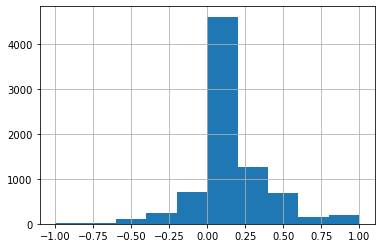

In [28]:
df['Polarity'].hist()

In [29]:
df['Subjectivity'].mean()

0.3491664890851517

In [30]:
df.shape

(8000, 8)

In [31]:
#Droping High Subjectivity 
df = df[df.Subjectivity > 0.5] 

### Polarity / Subjectivity after removing subjective tweets 

In [32]:
df['Polarity'].mean()

0.23797213470747042

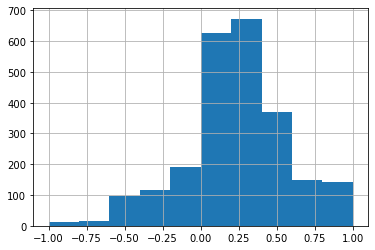

In [33]:
df['Polarity'].hist()

In [34]:
df['Subjectivity'].mean()

0.7157134094488127

In [35]:
df.shape

(2392, 8)

In [36]:
df = df[df.Subjectivity > 0.8] 

In [37]:
df.shape

(576, 8)

In [38]:
df['Polarity'].mean()

0.24303502535273347

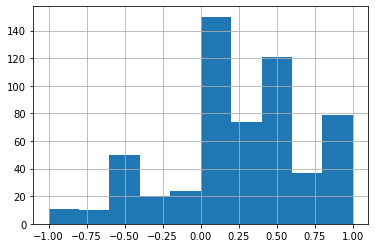

In [39]:
df['Polarity'].hist()

In [40]:
df['Subjectivity'].mean()

0.9441291887125198

### Short / Long Position count

In [41]:
def Wordcount(cleanLinks):
    if 'buying' in cleanLinks.lower():
        return 'buy positions'
    if 'selling' in cleanLinks.lower():
        return 'sell positions'  
    if 'buy' in cleanLinks.lower():
        return 'buy positions'
    if 'sell' in cleanLinks.lower():
        return 'sell positions'    
    if 'short' in cleanLinks.lower():
        return 'short positions'    
    if 'long' in cleanLinks.lower():
        return 'long positions'
    if 'put' in cleanLinks.lower():
        return 'puts placed'
    if 'call' in cleanLinks.lower():
        return 'calls placed'
    else: 
        return 

In [42]:
df['Market Position'] = df['cleanLinks'].apply(Wordcount)

In [43]:
df['Market Position'].value_counts()

calls placed       39
buy positions      25
puts placed        14
sell positions     10
short positions     5
long positions      2
Name: Market Position, dtype: int64

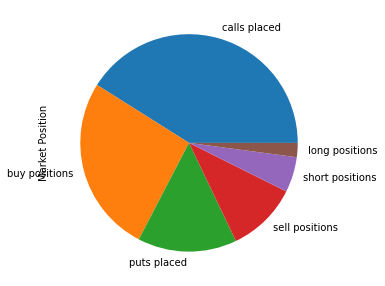

In [44]:
df['Market Position'].value_counts().plot(kind='pie',figsize=(10,5))

In [45]:
def Wordcount(cleanLinks):
    if 'buying' in cleanLinks.lower():
        return 'buy position'
    if 'selling' in cleanLinks.lower():
        return 'sell position'      
    if 'buy' in cleanLinks.lower():
        return 'buy position'
    if 'sell' in cleanLinks.lower():
        return 'sell position'    
    if 'short' in cleanLinks.lower():
        return 'sell position'    
    if 'long' in cleanLinks.lower():
        return 'buy position'
    if 'put' in cleanLinks.lower():
        return 'sell position'
    if 'call' in cleanLinks.lower():
        return 'buy position'
    else: 
        return 

In [46]:
df['Market Polar Position'] = df['cleanLinks'].apply(Wordcount)

In [47]:
df['Market Polar Position'].value_counts()

buy position     66
sell position    29
Name: Market Polar Position, dtype: int64

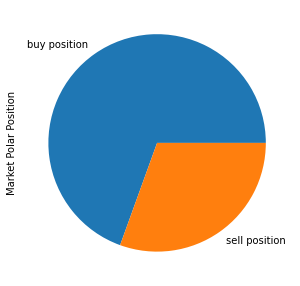

In [48]:
df['Market Polar Position'].value_counts().plot(kind='pie',figsize=(10,5))

In [49]:
List = ' '.join(df['cleanLinks'].tolist())

In [50]:
cleanLinkss = df['cleanLinks']

### Getting Stock Price change for the day

In [66]:
tsla = yf.Ticker(Yfinacne_ticker)

In [67]:
hist = tsla.history(period="day")

In [68]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-14,1664.99,1668.8,1631.0,1645.53,4831768,0,0


In [69]:
dh = hist

In [70]:
Change = dh['Close'] / dh['Open'] -1

In [71]:
Change

Date
2020-08-14   -0.011688
dtype: float64

### WordCloud

In [57]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [58]:
#img = cv2.imread('10wmt-superJumbo-v4.jpg')
#mask = img
unwanted = ['stock', 'market','moving','average','economy','stockmarket',
            'stocks','people','money','markets','tsla','today','elon','elonmusk','tesla']

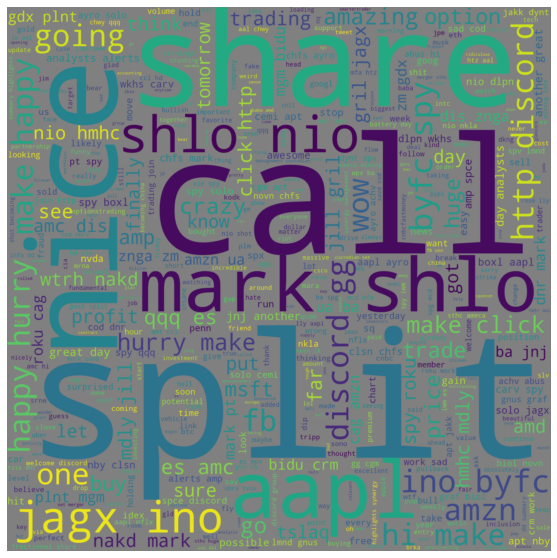

In [59]:
words = " ".join(df['cleanLinks'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered if ele not in unwanted])
wc= WordCloud(background_color="gray", random_state=1,stopwords=STOPWORDS, max_words = 500, width =2000, height = 2000)
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
#df.to_csv('TwitterData.csv')